In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

sns.set_style('darkgrid') 
matplotlib.rcParams['figure.figsize'] = (50,50)

## Importing `.csv`

In [2]:
df = pd.read_csv('df.csv')
df.head()
# df = df.dropna(axis=1,how='all')
df.set_index('FIPS')

,State,County,Years_of_Potential_Life_Lost_Rate,YPLL_Rate_(Black),YPLL_Rate_(Hispanic),YPLL_Rate_(White),percent_Fair_or_Poor,Physically_Unhealthy_Days,Mentally_Unhealthy_Days,percent_LBW,...,percent_65_and_over,percent_African_American,percent_American_Indian_or_Alaskan_Native,percent_Asian,percent_Native_Hawaiian_or_Other_Pacific_Islander,percent_Hispanic,percent_Non_Hispanic_White,percent_Not_Proficient_in_English,percent_Female,percent_Rural
FIPS,,,,,,,,,,,,,,,,,,,,,
1001,Alabama,Autauga,8824.057123,10471.252986,NaN,8706.658832,18.411124,4.200578,4.306739,8.475719,...,15.119631,19.254468,0.475641,1.279187,0.104497,2.857452,74.473912,0.828548,51.342246,42.002162
1003,Alabama,Baldwin,7224.632160,10042.472874,3086.605695,7277.780727,18.060458,4.098748,4.249649,8.338683,...,19.947044,8.953195,0.776003,1.156480,0.068665,4.550200,83.047388,0.454512,51.452772,42.279099
1005,Alabama,Barbour,9586.165037,11332.562909,NaN,7309.636719,25.773416,5.067438,4.634994,10.952624,...,18.824693,47.942224,0.652948,0.463000,0.185991,4.206569,45.955679,1.199273,47.229917,67.789635
1007,Alabama,Bibb,11783.543675,14812.539280,NaN,11327.563749,19.996912,4.363377,4.315710,11.105003,...,16.022587,21.457561,0.427916,0.220575,0.114699,2.638080,74.298571,0.394348,46.453150,68.352607
1009,Alabama,Blount,10908.101822,NaN,5619.645186,11336.046321,21.095323,4.512753,4.701599,7.926829,...,17.842553,1.460018,0.632617,0.301657,0.117215,9.565097,86.944306,1.870004,50.688639,89.951502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56037,Wyoming,Sweetwater,7497.439952,NaN,6413.215910,7834.050381,15.377168,3.536556,3.543546,9.420457,...,11.375017,1.091101,1.534433,0.833831,0.142417,16.249368,79.358662,1.582845,48.454082,10.916313
56039,Wyoming,Teton,3786.128226,NaN,NaN,NaN,12.181700,3.166316,3.072253,7.473928,...,14.395014,0.532989,0.906942,1.229314,0.133247,14.983881,81.702128,4.042033,48.098001,46.430920
56041,Wyoming,Uinta,7790.302043,NaN,NaN,NaN,15.885755,3.677538,3.699922,9.647495,...,13.188583,0.683093,1.395462,0.492803,0.175653,9.163211,87.474994,0.911363,49.573067,43.095937


## Multicollinearity check

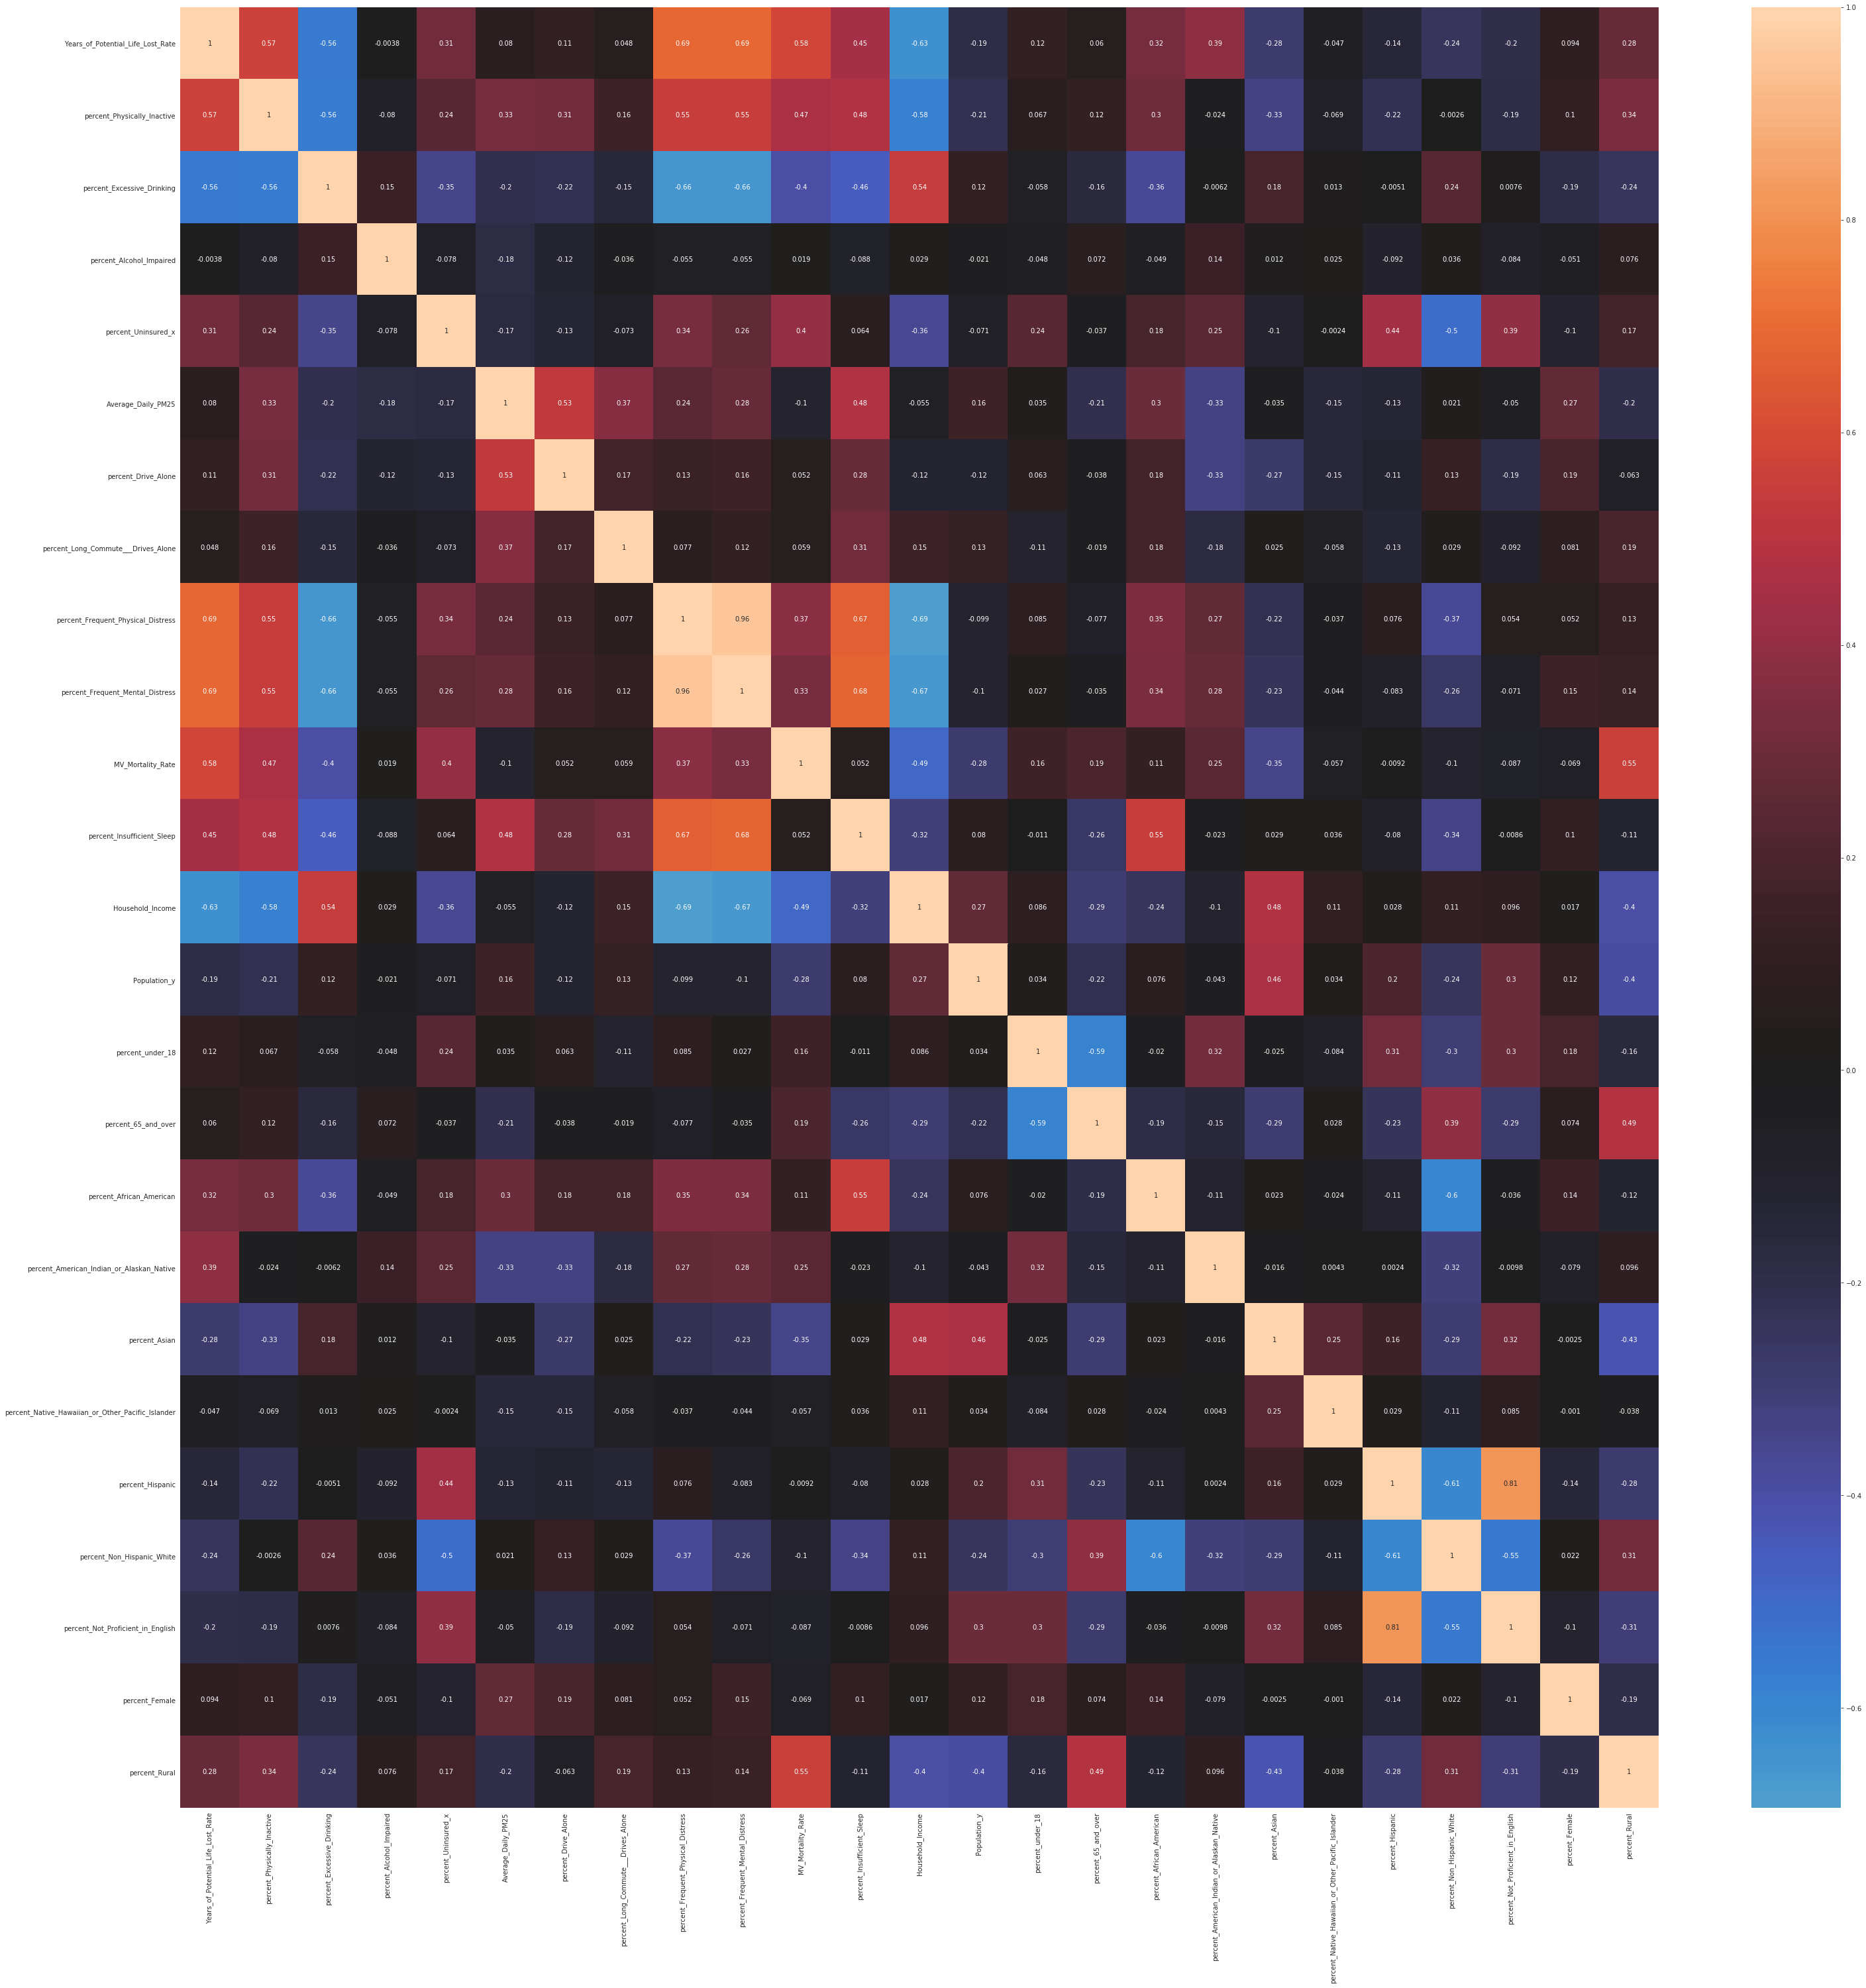

In [3]:
features = ['Years_of_Potential_Life_Lost_Rate',
         'percent_Physically_Inactive',
         'percent_Excessive_Drinking',
         'percent_Alcohol_Impaired',
         'percent_Uninsured_x',
         'Average_Daily_PM25',
         'percent_Drive_Alone',
         'percent_Long_Commute___Drives_Alone',
         'percent_Frequent_Physical_Distress',
         'percent_Frequent_Mental_Distress',
         'MV_Mortality_Rate',
         'percent_Insufficient_Sleep',
         'Household_Income',
         'Population_y',
         'percent_under_18',
         'percent_65_and_over',
         'percent_African_American',
         'percent_American_Indian_or_Alaskan_Native',
         'percent_Asian',
         'percent_Native_Hawaiian_or_Other_Pacific_Islander',
         'percent_Hispanic',
         'percent_Non_Hispanic_White',
         'percent_Not_Proficient_in_English',
         'percent_Female',
         'percent_Rural'
        ]
sns.heatmap(df[features].corr(), center=0, annot=True);

In [4]:
for col in df[features].columns:
        pct_missing = np.mean(df[col].isnull())
        print(f'{col} - {round(pct_missing*100)}% missing')

Years_of_Potential_Life_Lost_Rate - 0.0% missing
percent_Physically_Inactive - 0.0% missing
percent_Excessive_Drinking - 0.0% missing
percent_Alcohol_Impaired - 0.0% missing
percent_Uninsured_x - 0.0% missing
Average_Daily_PM25 - 0.0% missing
percent_Drive_Alone - 0.0% missing
percent_Long_Commute___Drives_Alone - 0.0% missing
percent_Frequent_Physical_Distress - 0.0% missing
percent_Frequent_Mental_Distress - 0.0% missing
MV_Mortality_Rate - 0.0% missing
percent_Insufficient_Sleep - 0.0% missing
Household_Income - 0.0% missing
Population_y - 0.0% missing
percent_under_18 - 0.0% missing
percent_65_and_over - 0.0% missing
percent_African_American - 0.0% missing
percent_American_Indian_or_Alaskan_Native - 0.0% missing
percent_Asian - 0.0% missing
percent_Native_Hawaiian_or_Other_Pacific_Islander - 0.0% missing
percent_Hispanic - 0.0% missing
percent_Non_Hispanic_White - 0.0% missing
percent_Not_Proficient_in_English - 0.0% missing
percent_Female - 0.0% missing
percent_Rural - 0.0% missin

## Train/Test split

In [5]:
train, test = train_test_split(df)

In [6]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

NameError: name 'x_cols' is not defined

### Remove uninfluencial features

In [ ]:
# Your code here - Remove features which do not appear to be statistically relevant
# Extract the p-value table from the summary and use it to subset our features
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()